### Problem 1

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \$3145.13.  Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

AOV is calculated:
$$
AOV = \frac{\sum_{i=1}^{n}(order\_amount)}{n} \text{, where n is the number of orders} 
$$

A few things to look into are:

    a. Missing data

    b. Outliers 

On identifying the outliers, we can remove the outliers and see if the AOV is still the same.


In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [2]:
# Previewing the data
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
# Checking for missing values
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

There seem to be no missing values, the problem could possibly be in the outliers.

In [4]:
# Converting the date to a datetime object
df["created_at"] = pd.to_datetime(df["created_at"])

In [5]:
# Recreating the Wrong AOV
wrong_aov = df["order_amount"].sum()/df["order_amount"].count()
print("${:.2f} per order".format(wrong_aov))

$3145.13 per order


In [6]:
# Filtering the dataframe to remove all possible outliers
upper_limit = df["order_amount"].quantile(0.975)
lower_limit = df["order_amount"].quantile(0.025)

# updating the dataframe with the outliers removed
df['order_amount_no_outlier'] = np.where(
    df['order_amount']>upper_limit,
    upper_limit,
    np.where(
        df['order_amount']<lower_limit,
        lower_limit,
        df['order_amount']
    )
)

<AxesSubplot:ylabel='order_amount'>

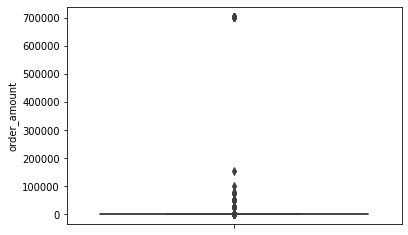

In [7]:
# Without removing the outliers
sns.boxplot(y = "order_amount", data = df)

<AxesSubplot:ylabel='order_amount_no_outlier'>

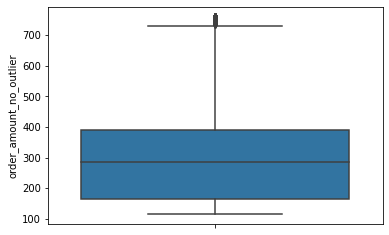

In [8]:
# Removing the outliers
sns.boxplot(y = "order_amount_no_outlier", data = df)

In [9]:
# Getting the correct AOV
correct_aov = df["order_amount_no_outlier"].sum()/df["order_amount_no_outlier"].count()
print("${:.2f} per order".format(correct_aov))

$307.07 per order


The above estimate seems a more realistic estimate than the one we got from the data before we removed the outliers.

2. What metric would you report for this dataset?

A suitable metric would be the average unit per order value, which can be calculated as follows:
$$
AUOV = \frac{\sum_{i = 1}^{n}\frac{order\_amount_{i}}{total\_items_{i}}}{n}
$$


In [10]:
auov = (df["order_amount"]/df["total_items"]).sum()/df["order_amount"].count()
print("${:.2f} per unit per order".format(auov))

$387.74 per unit per order


What is its value?

The value of AUOV is: \$ 387.74

### Problem 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below

1. How many orders were shipped by Speedy Express in total?

```SELECT COUNT(*) as number_of_orders from orders where ShipperID == (SELECT ShipperID from Shippers where ShipperName == "Speedy Express") group by ShipperID```

![image1](1.png)

Speedy express shipped a total of 54 orders.

2. What is the last name of the employee with the most orders?

```SELECT LastName from (SELECT e.LastName, COUNT(o.orderID) as number_of_orders from employees as e, orders as o where e.EmployeeId == o.EmployeeID GROUP BY o.EmployeeID ORDER BY 2 DESC LIMIT 1)```

![image2](2.png)

Person with last name "Peacock" had the most orders with orders = 40.

3. What product was ordered the most by customers in Germany?

```
SELECT ProductName from Products where ProductId IN (SELECT ProductId from (SELECT ProductId, SUM(Quantity) as total_quantity from OrderDetails where OrderID IN (SELECT OrderId from Orders where CustomerId IN (SELECT CustomerId FROM Customers where Country == "Germany")) GROUP BY ProductId ORDER BY 2 DESC LIMIT 1)) 
```

![image3](3.png)

'Boston Crab Meat' was ordered the most by customers in Germany upto 160 in quantity.